In [13]:
import sqlite3
import pandas as pd

In [16]:
conn = sqlite3.connect('/Users/beautifulmonster/Desktop/DataQuest/factbook.db')
cursor = conn.cursor()

In [19]:
q3 = '''
select * 
from facts 
where population == (select min(population) from facts)
'''
pd.read_sql_query(q3, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [20]:
q4 = '''
select *
from facts 
where population == (select max(population) from facts)
'''
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


From these result, I could see that mininum population is 0 and the maximum population is 7256490011

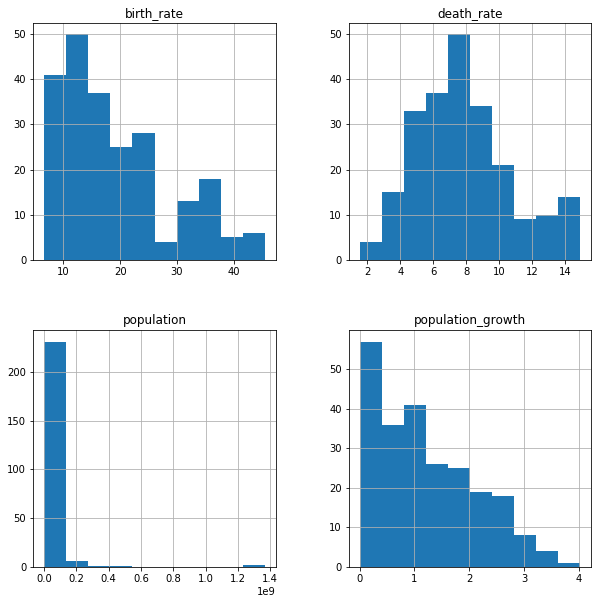

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
q5 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select max(population) from facts)
'''

pd.read_sql_query(q5, conn).hist(ax = ax);

## Inner Join
including only rows from each table that they have a match as specified using the ON clause